In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 報告主題：`Pandas`資料清理及`Scikit-Learn`機器學習統整

# 報告大綱：

1. 資料分析/定義問題
<br><br>
2. 資料清理
<br><br>
3. 迴歸分析
<br><br>
4. 非監督式學習
    * K-means
<br><br>
5. 監督式學習
    * KNN
    * Decision Tree
    * Random Forests
    * SVM
<br><br>    
6. 模型比較

# <font color=darkblue> 1. 資料分析/定義問題 </font> 

In [2]:
df = pd.read_csv("airline.csv")

In [3]:
df.head()

,user_id,is_loyal,depart_on_time,arrive_on_time,register_method,register_rate,class,seat_rate,meal_rate,flight_rate,...,tv_ad,youtube_ad_1,youtube_ad_2,youtube_ad_3,dm_message,dm_post,dm_email,credit_card_vendor,credit_card_bonus,coupon
0,00411460f7c92d2124a67ea0f4cb5f85,Satisfied,1,1,phone,3,3,3,3,3,...,1,0,1,0,0,0,0,Vendor A,2,196.7
1,006f52e9102a8d3be2fe5614f42ba989,Satisfied,0,0,mobile_app,2,2,4,4,2,...,1,0,0,0,1,1,0,Vendor A,3,53.6
2,00ac8ed3b4327bdd4ebbebcb2ba10a00,Unsatisfied,1,1,others,4,3,1,3,2,...,0,1,1,1,1,0,1,Vendor C,1,107.8
3,00ec53c4682d36f5c4359f4ae7bd7ba1,Unsatisfied,0,0,others,3,3,1,2,2,...,1,1,1,1,1,0,1,Vendor B,2,37.5
4,01161aaa0b6d1345dd8fe4e481144d84,Satisfied,1,1,phone,4,2,4,4,5,...,1,0,0,1,1,0,0,Vendor B,1,43.3


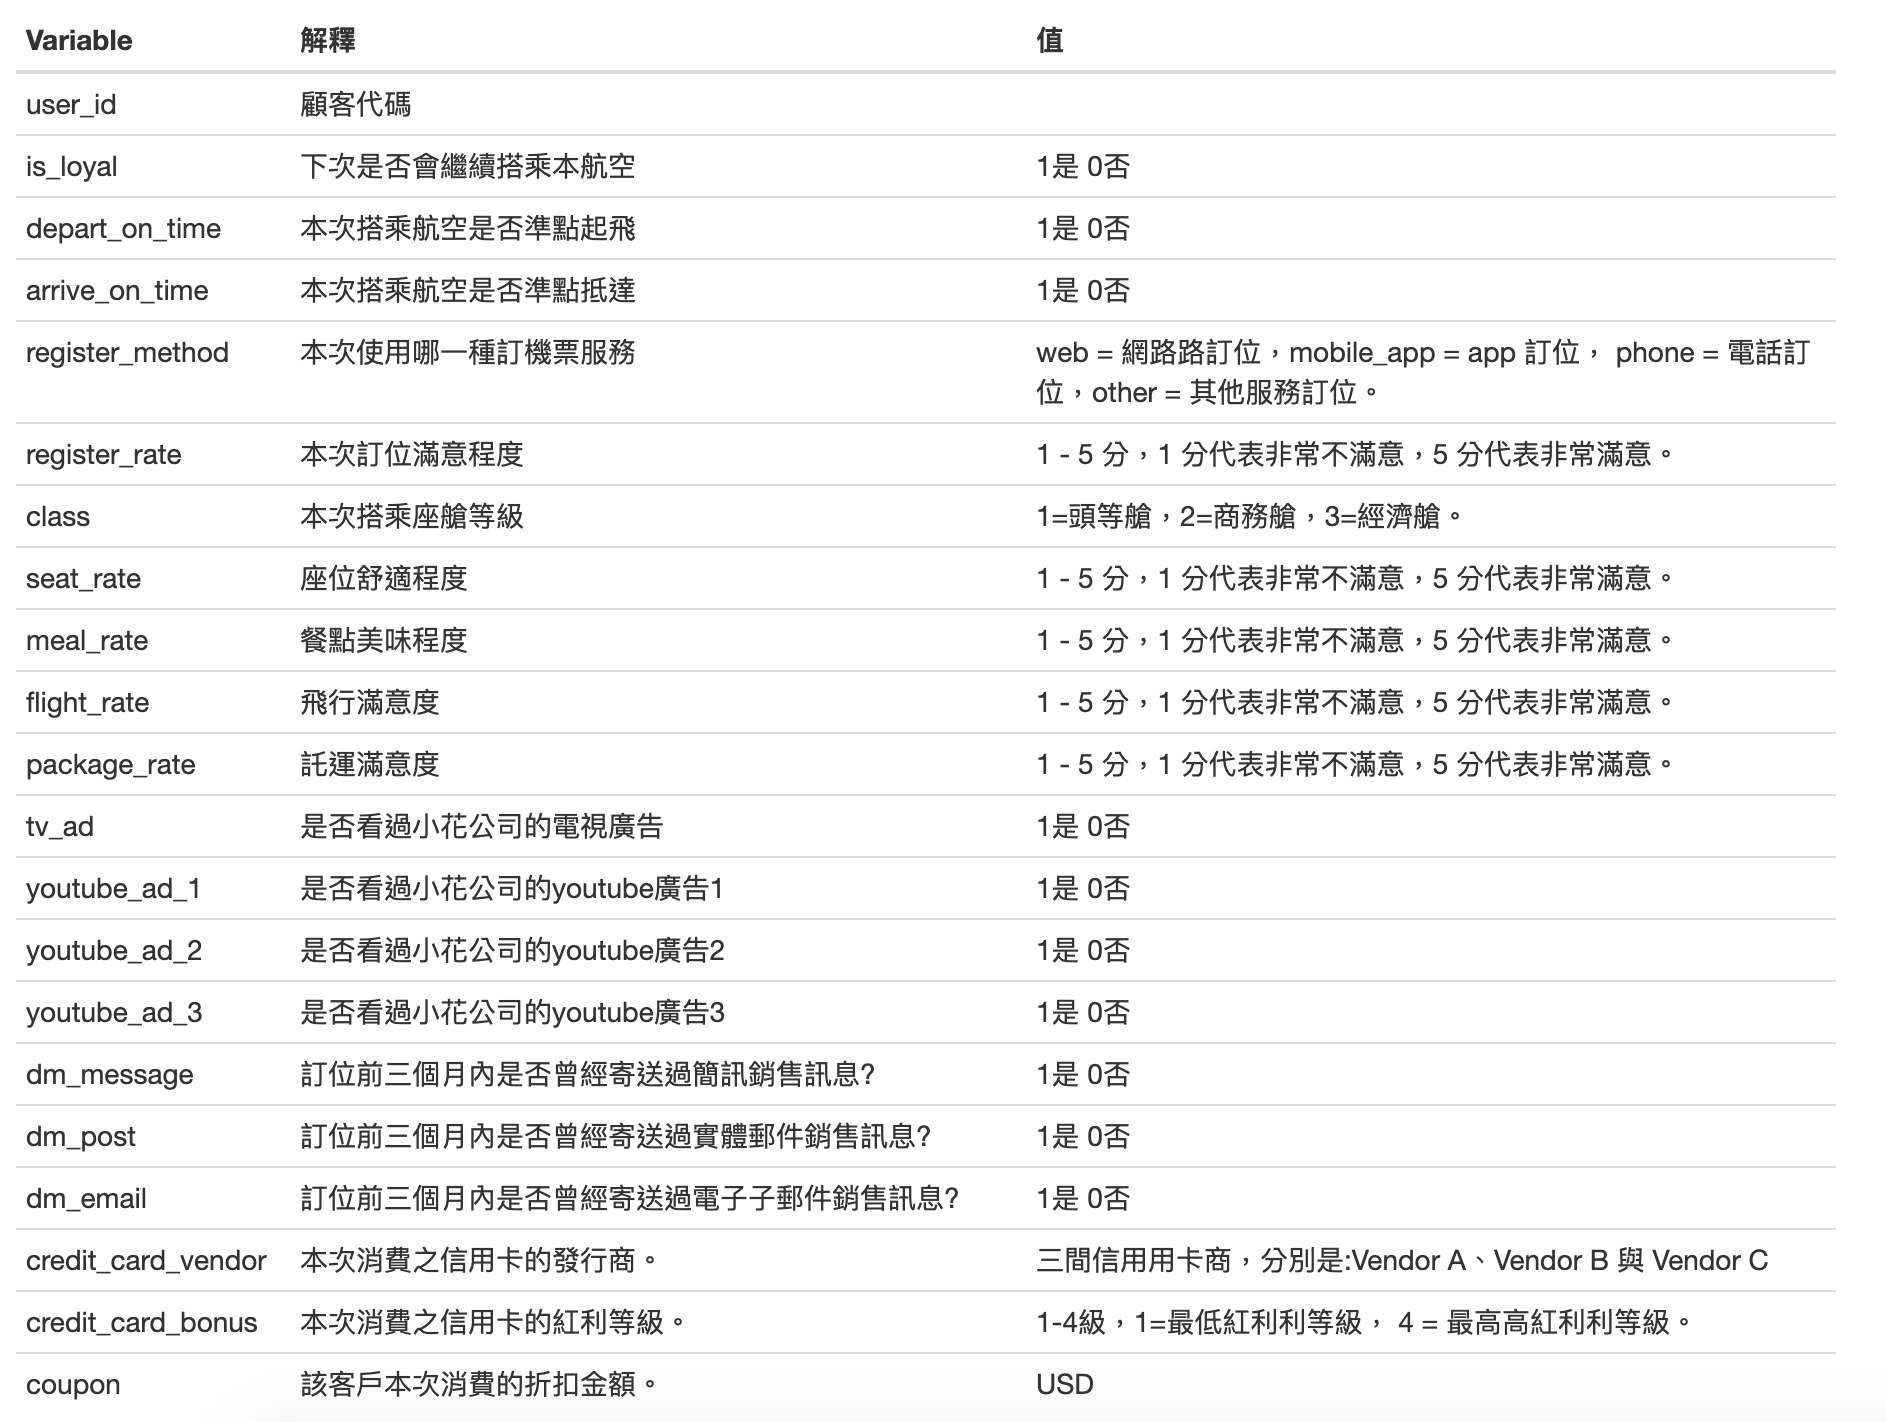

In [4]:
#資料集內各變數解釋
from IPython.display import Image
Image(filename="datainfo.png")

In [5]:
#確認資料型態
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
user_id               1000 non-null object
is_loyal              1000 non-null object
depart_on_time        1000 non-null int64
arrive_on_time        1000 non-null int64
register_method       1000 non-null object
register_rate         1000 non-null int64
class                 1000 non-null int64
seat_rate             1000 non-null int64
meal_rate             1000 non-null int64
flight_rate           1000 non-null int64
package_rate          1000 non-null int64
tv_ad                 1000 non-null int64
youtube_ad_1          1000 non-null int64
youtube_ad_2          1000 non-null int64
youtube_ad_3          1000 non-null int64
dm_message            1000 non-null int64
dm_post               1000 non-null int64
dm_email              1000 non-null int64
credit_card_vendor    1000 non-null object
credit_card_bonus     1000 non-null int64
coupon                1000 non-null float64
dtypes

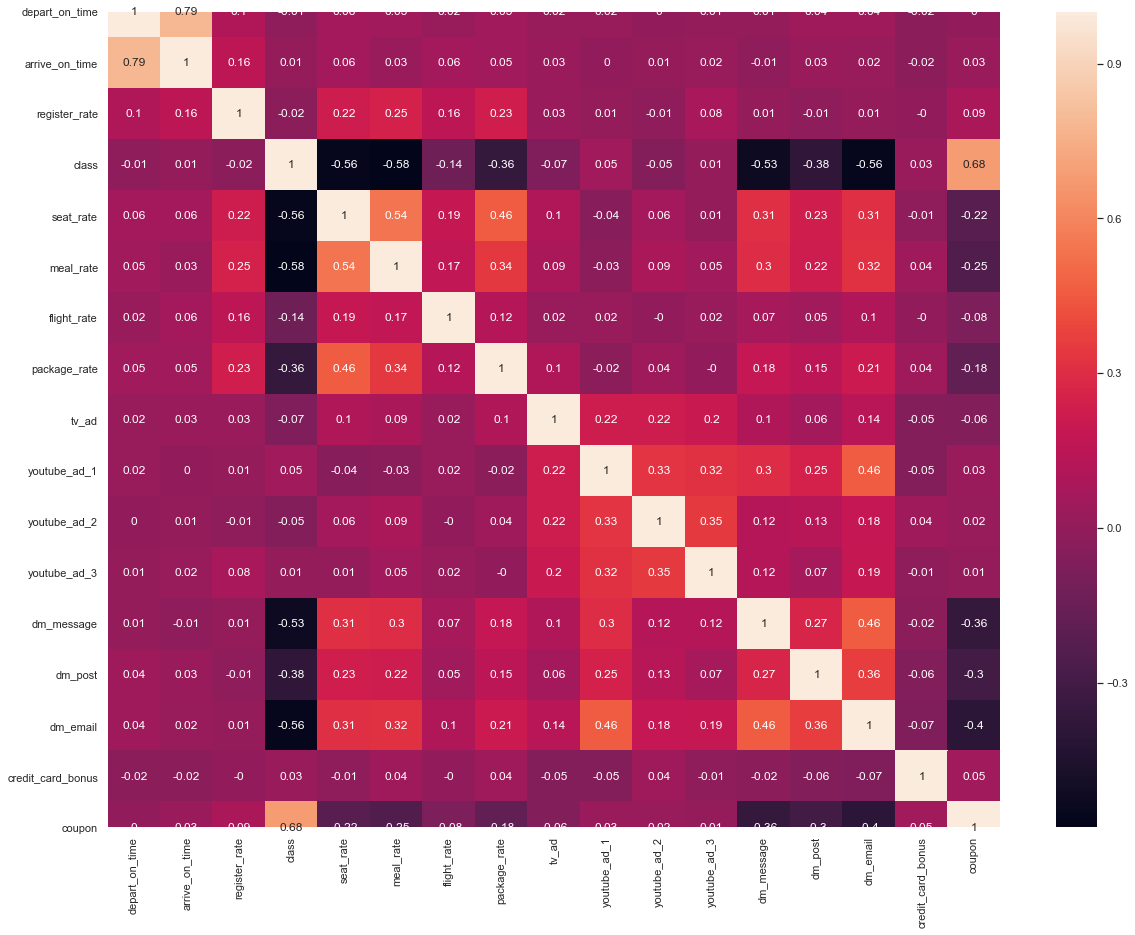

In [6]:
# 初步了解各變數間關係
correlation_matrix = df.corr().round(2)
sns.set(rc={"figure.figsize":(20, 15)}) #透過rc改圖大小
sns.heatmap(correlation_matrix, annot = True) #把相關係數畫出來

# ＊<font color=darkred>定義問題：數據對於航空公司的顧客忠誠度的影響</font>＊

# <font color=darkblue> 2. 資料清理 </font> 

In [7]:
#drop使用者id
df.drop("user_id", axis=1, inplace=True)

In [8]:
#轉換無階層的類別型資料為dummy：註冊方法＆信用卡發行商
from sklearn.preprocessing import OneHotEncoder

pf = pd.get_dummies(df[['register_method']])
df = pd.concat([df, pf], axis=1)
df.drop(['register_method'], axis=1, inplace=True)

pf2 = pd.get_dummies(df[['credit_card_vendor']])
df = pd.concat([df, pf2], axis=1)
df.drop(['credit_card_vendor'], axis=1, inplace=True)

In [9]:
#轉換有階層的類別型資料為數字：忠誠度
size_mapping = {
    'Unsatisfied': 0,
    'Satisfied': 1}
df['is_loyal'] = df['is_loyal'].map(size_mapping)

In [10]:
df.head()

,is_loyal,depart_on_time,arrive_on_time,register_rate,class,seat_rate,meal_rate,flight_rate,package_rate,tv_ad,...,dm_email,credit_card_bonus,coupon,register_method_mobile_app,register_method_others,register_method_phone,register_method_website,credit_card_vendor_Vendor A,credit_card_vendor_Vendor B,credit_card_vendor_Vendor C
0,1,1,1,3,3,3,3,3,3,1,...,0,2,196.7,0,0,1,0,1,0,0
1,1,0,0,2,2,4,4,2,4,1,...,0,3,53.6,1,0,0,0,1,0,0
2,0,1,1,4,3,1,3,2,2,0,...,1,1,107.8,0,1,0,0,0,0,1
3,0,0,0,3,3,1,2,2,3,1,...,1,2,37.5,0,1,0,0,0,1,0
4,1,1,1,4,2,4,4,5,3,1,...,0,1,43.3,0,0,1,0,0,1,0


In [11]:
# 找出需要做標準化的行，另設為新的dataframe
df1 = df.loc[:, "register_rate":"package_rate"]
df2 = df.loc[:, "credit_card_bonus":"coupon"]
df_stand = pd.concat([df1, df2], axis=1)
df_stand.head()

,register_rate,class,seat_rate,meal_rate,flight_rate,package_rate,credit_card_bonus,coupon
0,3,3,3,3,3,3,2,196.7
1,2,2,4,4,2,4,3,53.6
2,4,3,1,3,2,2,1,107.8
3,3,3,1,2,2,3,2,37.5
4,4,2,4,4,5,3,1,43.3


In [12]:
#使用Min-Max標準化數據：保留資料原始分佈，收斂至0-1區間
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(df_stand)  
rate = pd.DataFrame(mm_scaled, columns=df_stand.columns)
rate.head()

,register_rate,class,seat_rate,meal_rate,flight_rate,package_rate,credit_card_bonus,coupon
0,0.50,1.0,0.50,0.50,0.50,0.50,0.333333,0.664598
1,0.25,0.5,0.75,0.75,0.25,0.75,0.666667,0.171320
2,0.75,1.0,0.00,0.50,0.25,0.25,0.000000,0.358152
3,0.50,1.0,0.00,0.25,0.25,0.50,0.333333,0.115822
4,0.75,0.5,0.75,0.75,1.00,0.50,0.000000,0.135815


In [13]:
#替換原始數據為標準化數據
df.drop(["register_rate", "class", "seat_rate", "meal_rate", "flight_rate", "package_rate", "credit_card_bonus","coupon"], axis=1, inplace=True)
df = pd.concat([df, rate], axis=1)

In [14]:
df.head()

,is_loyal,depart_on_time,arrive_on_time,tv_ad,youtube_ad_1,youtube_ad_2,youtube_ad_3,dm_message,dm_post,dm_email,...,credit_card_vendor_Vendor B,credit_card_vendor_Vendor C,register_rate,class,seat_rate,meal_rate,flight_rate,package_rate,credit_card_bonus,coupon
0,1,1,1,1,0,1,0,0,0,0,...,0,0,0.50,1.0,0.50,0.50,0.50,0.50,0.333333,0.664598
1,1,0,0,1,0,0,0,1,1,0,...,0,0,0.25,0.5,0.75,0.75,0.25,0.75,0.666667,0.171320
2,0,1,1,0,1,1,1,1,0,1,...,0,1,0.75,1.0,0.00,0.50,0.25,0.25,0.000000,0.358152
3,0,0,0,1,1,1,1,1,0,1,...,1,0,0.50,1.0,0.00,0.25,0.25,0.50,0.333333,0.115822
4,1,1,1,1,0,0,1,1,0,0,...,1,0,0.75,0.5,0.75,0.75,1.00,0.50,0.000000,0.135815


# <font color=darkblue> 3. 迴歸分析 </font> 

In [15]:
#分訓練集與測試集

from sklearn.model_selection import train_test_split
X = df.drop("is_loyal", axis = 1) #除去結果本身的所有變數
Y = df["is_loyal"]
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=0)

In [16]:
#迴歸分析
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)
lm_predict = model.predict(x_test)

In [17]:
#評估結果
from sklearn.metrics import classification_report, confusion_matrix, precision_score

print("Logistic Regression 結果報告：")
print(classification_report(y_test, lm_predict))
print('\n')
print("混淆矩陣：")
print(confusion_matrix(y_test,lm_predict))
print('\n')
print("準確率：")
print(precision_score(y_test,lm_predict))

Logistic Regression 結果報告：
              precision    recall  f1-score   support

           0       0.97      0.83      0.89        75
           1       0.90      0.98      0.94       125

    accuracy                           0.93       200
   macro avg       0.94      0.91      0.92       200
weighted avg       0.93      0.93      0.92       200



混淆矩陣：
[[ 62  13]
 [  2 123]]


準確率：
0.9044117647058824


# <font color=darkblue> 4. 非監督式學習 </font> 

### <font color=#955C12> ＊ K-Means </font>

In [18]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
clf.fit(x_train,y_train)
KMeans_predict = clf.predict(x_test)

In [19]:
#評估結果

print("K-Means 結果報告：")
print(classification_report(y_test, KMeans_predict))
print('\n')
print("混淆矩陣：")
print(confusion_matrix(y_test,KMeans_predict))
print('\n')
print("準確率：")
print(precision_score(y_test,KMeans_predict))

K-Means 結果報告：
              precision    recall  f1-score   support

           0       0.42      0.75      0.54        75
           1       0.72      0.39      0.51       125

    accuracy                           0.53       200
   macro avg       0.57      0.57      0.52       200
weighted avg       0.61      0.53      0.52       200



混淆矩陣：
[[56 19]
 [76 49]]


準確率：
0.7205882352941176


# <font color=darkblue> 5. 監督式學習 </font> 

### <font color=#955C12> ＊ KNN模型分析 </font> 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,70):
    knn = KNeighborsClassifier(n_neighbors=i) #開學習機
    knn.fit(x_train,y_train) #訓練
    pred_i = knn.predict(x_test) #預測
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

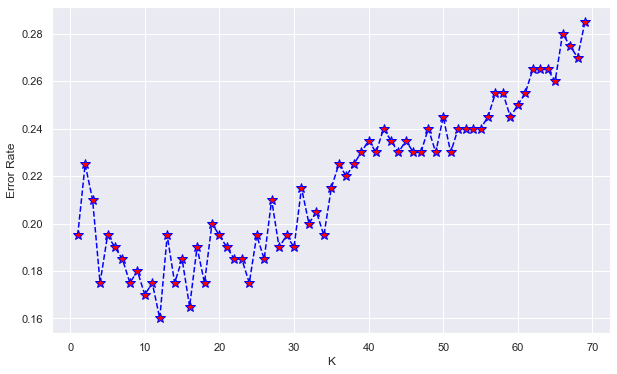

In [21]:
# 用Error Rate最低點找K值
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed',
         marker='*',markerfacecolor='red', markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate')

In [22]:
#使用K=1訓練模型

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred_1 = knn.predict(x_test)

print("使用 K=1：")
print('\n')
print("結果報告：")
print(classification_report(y_test,pred_1))
print('\n')
print("混淆矩陣：")
print(confusion_matrix(y_test,pred_1))
print('\n')
print("準確率：")
print(precision_score(y_test,pred_1))

使用 K=1：


結果報告：
              precision    recall  f1-score   support

           0       0.79      0.65      0.72        75
           1       0.81      0.90      0.85       125

    accuracy                           0.81       200
   macro avg       0.80      0.77      0.78       200
weighted avg       0.80      0.81      0.80       200



混淆矩陣：
[[ 49  26]
 [ 13 112]]


準確率：
0.8115942028985508


In [23]:
#使用K=9(Error Rate最低點)訓練模型

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
pred_9 = knn.predict(x_test)

print("使用 K=9：")
print('\n')
print("結果報告：")
print(classification_report(y_test,pred_9))
print('\n')
print("混淆矩陣：")
print(confusion_matrix(y_test,pred_9))
print('\n')
print("準確率：")
print(precision_score(y_test,pred_9))

使用 K=9：


結果報告：
              precision    recall  f1-score   support

           0       0.82      0.67      0.74        75
           1       0.82      0.91      0.86       125

    accuracy                           0.82       200
   macro avg       0.82      0.79      0.80       200
weighted avg       0.82      0.82      0.82       200



混淆矩陣：
[[ 50  25]
 [ 11 114]]


準確率：
0.8201438848920863


### <font color=#955C12> ＊ Decision Tree </font> 

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtree_predict = dtree.predict(x_test)

In [25]:
#評估結果

print("Decision Tree 結果報告：")
print(classification_report(y_test, dtree_predict))
print('\n')
print("混淆矩陣：")
print(confusion_matrix(y_test,dtree_predict))
print('\n')
print("準確率：")
print(precision_score(y_test,dtree_predict))

Decision Tree 結果報告：
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        75
           1       0.86      0.91      0.88       125

    accuracy                           0.85       200
   macro avg       0.85      0.83      0.84       200
weighted avg       0.85      0.85      0.85       200



混淆矩陣：
[[ 56  19]
 [ 11 114]]


準確率：
0.8571428571428571


### <font color=#955C12> ＊ Random Forest </font> 

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)

In [27]:
#評估結果

print("Random Forest 結果報告：")
print(classification_report(y_test,rf_predict))
print('\n')
print("混淆矩陣：")
print(confusion_matrix(y_test,rf_predict))
print('\n')
print("準確率：")
print(precision_score(y_test,rf_predict))

Random Forest 結果報告：
              precision    recall  f1-score   support

           0       0.93      0.73      0.82        75
           1       0.86      0.97      0.91       125

    accuracy                           0.88       200
   macro avg       0.90      0.85      0.87       200
weighted avg       0.89      0.88      0.88       200



混淆矩陣：
[[ 55  20]
 [  4 121]]


準確率：
0.8581560283687943


### <font color=#955C12> ＊ SVM </font> 

In [28]:
from sklearn.svm import SVC
clf = SVC(gamma="auto")
clf.fit(x_train, y_train)
svm_predict = clf.predict(x_test)

In [29]:
#評估結果

print("SVM 結果報告：")
print(classification_report(y_test,svm_predict))
print('\n')
print("混淆矩陣：")
print(confusion_matrix(y_test,svm_predict))
print('\n')
print("準確率：")
print(precision_score(y_test,svm_predict))

SVM 結果報告：
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        75
           1       0.88      0.98      0.93       125

    accuracy                           0.91       200
   macro avg       0.92      0.88      0.89       200
weighted avg       0.91      0.91      0.90       200



混淆矩陣：
[[ 58  17]
 [  2 123]]


準確率：
0.8785714285714286


# <font color=darkblue> 6. 模型比較 </font> 

In [30]:
print("邏輯回歸準確率：")
print(precision_score(y_test,lm_predict))
print('\n')
print("K-Means準確率：")
print(precision_score(y_test,KMeans_predict))
print('\n')
print("KNN 準確率：")
print(precision_score(y_test,pred_9))
print('\n')
print("決策樹準確率：")
print(precision_score(y_test,dtree_predict))
print('\n')
print("隨機森林準確率：")
print(precision_score(y_test,rf_predict))
print('\n')
print("SVM 準確率：")
print(precision_score(y_test,svm_predict))

邏輯回歸準確率：
0.9044117647058824


K-Means準確率：
0.7205882352941176


KNN 準確率：
0.8201438848920863


決策樹準確率：
0.8571428571428571


隨機森林準確率：
0.8581560283687943


SVM 準確率：
0.8785714285714286


In [31]:
models = ["Logistic Regression", "K-Means", "KNN", "Decision Tree", "Random Forest", "SVM"]
results = [precision_score(y_test,lm_predict).round(2), 
           precision_score(y_test,KMeans_predict).round(2),
           precision_score(y_test,pred_9).round(2),
           precision_score(y_test,dtree_predict).round(2),
           precision_score(y_test,rf_predict).round(2),
           precision_score(y_test,svm_predict).round(2)]

Text(0.5, 1.0, 'Intra-Model Comparison')

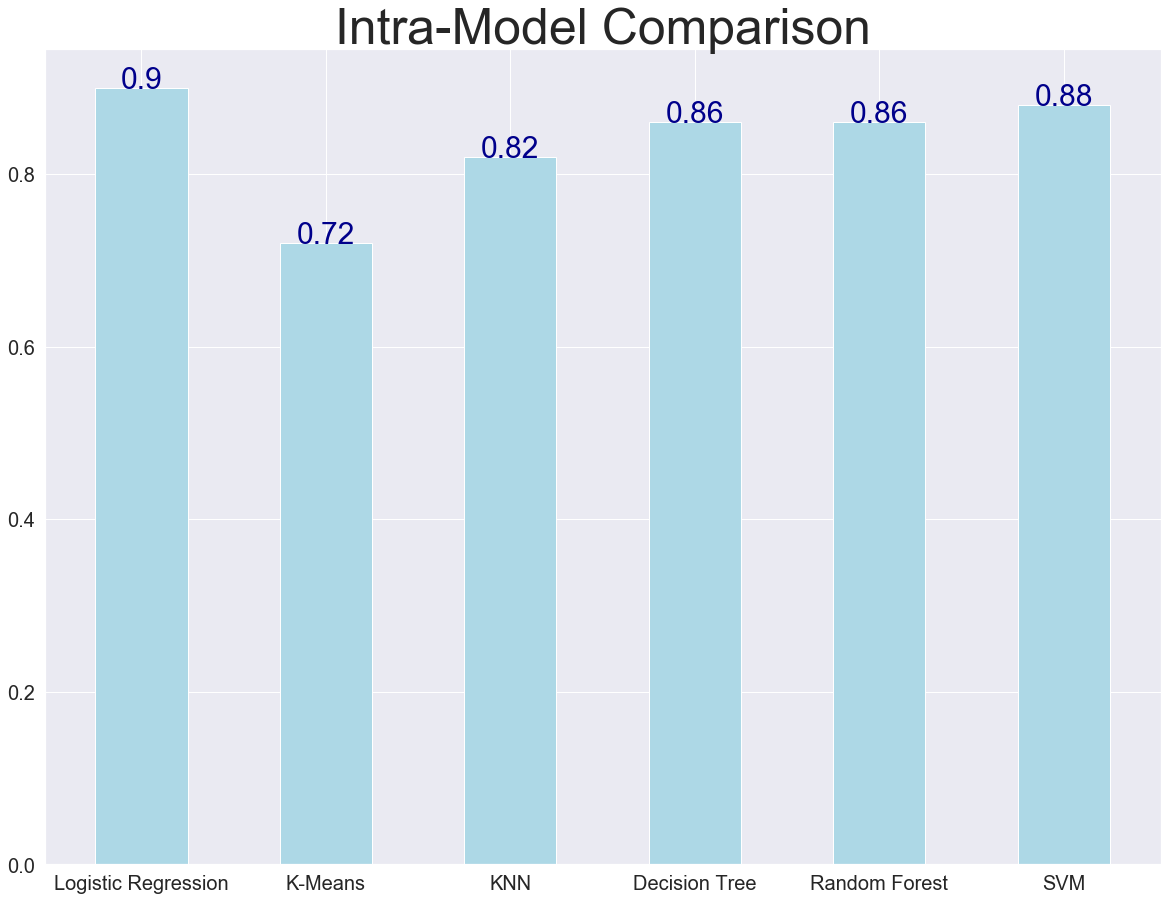

In [32]:
plt.bar(models, results, width=0.5, color="lightblue")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for x,y in enumerate(results):
    plt.text(x,y,'%s'%y,ha='center', fontsize=30, color="darkblue")
    
plt.title("Intra-Model Comparison", fontsize=50)